바닐라 아이스크림이 가장 기본적인 맛을 가진 아이스크림인 것처럼, 앞서 배운 RNN을 가장 단순한 형태의 RNN이라고 하여 바닐라 RNN(Vanilla RNN)이라고 합니다. (케라스에서는 SimpleRNN) 바닐라 RNN 이후 바닐라 RNN의 한계를 극복하기 위한 다양한 RNN의 변형이 나왔습니다. 이번 챕터에서 배우게 될 LSTM도 그 중 하나입니다. 앞으로의 설명에서 LSTM과 비교하여 RNN을 언급하는 것은 전부 바닐라 RNN을 말합니다.

# 1. 바닐라 RNN의 한계

---

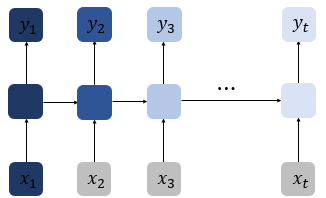

앞 챕터에서 바닐라 RNN은 출력 결과가 이전의 계산 결과에 의존한다는 것을 언급한 바 있습니다. 하지만 바닐라 RNN은 비교적 짧은 시퀀스(sequence)에 대해서만 효과를 보이는 단점이 있습니다. 바닐라 RNN의 시점(time step)이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생합니다. 위의 그림은 첫번째 입력값인 $x_1$의 정보량을 짙은 남색으로 표현했을 때, 색이 점차 얕아지는 것으로 시점이 지날수록 $x_1$의 정보량이 손실되어가는 과정을 표현하였습니다. 뒤로 갈수록 $x_1$의 정보량은 손실되고, 시점이 충분히 긴 상황에서는 $x_1$의 전체 정보에 대한 영향력은 거의 의미가 없을 수도 있습니다.

어쩌면 가장 중요한 정보가 시점의 앞 쪽에 위치할 수도 있습니다. RNN으로 만든 언어 모델이 다음 단어를 예측하는 과정을 생각해봅시다. 예를 들어 ''모스크바에 여행을 왔는데 건물도 예쁘고 먹을 것도 맛있었어. 그런데 글쎄 직장 상사한테 전화가 왔어. 어디냐고 묻더라구 그래서 나는 말했지. 저 여행왔는데요. 여기 _ _ _'' 다음 단어를 예측하기 위해서는 장소 정보가 필요합니다. 그런데 장소 정보에 해당되는 단어인 '모스크바'는 앞에 위치하고 있고, RNN이 충분한 기억력을 가지고 있지 못한다면 다음 단어를 엉뚱하게 예측합니다.

이를 **장기 의존성 문제(the problem of Long-Term Dependencies)** 라고 합니다.

# 2. 바닐라 RNN 내부 열어보기

---

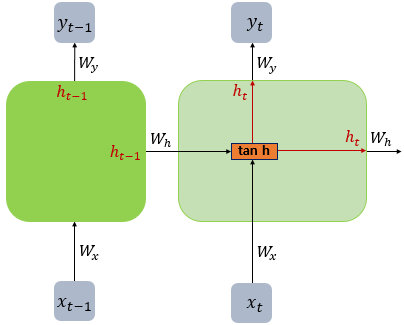

LSTM에 대해서 이해해보기 전에 바닐라 RNN의 뚜껑을 열어보겠습니다. 위의 그림은 바닐라 RNN의 내부 구조를 보여줍니다. 이 책에서는 RNN 계열의 인공 신경망의 그림에서는 편향 $b$를 생략합니다. 위의 그림에 편향 $b$를 그린다면 $x_t$ 옆에 tanh로 향하는 또 하나의 입력선을 그리면 됩니다.

$$h_{t} = tanh(W_{x}x_{t} + W_{h}h_{t−1} + b)$$

바닐라 RNN은 $x_t$와 $h_{t-1}$이라는 두 개의 입력이 각각의 가중치와 곱해져서 메모리 셀의 입력이 됩니다. 그리고 이를 하이퍼볼릭탄젠트 함수의 입력으로 사용하고 이 값은 은닉층의 출력인 은닉 상태가 됩니다.

# 3. LSTM(Long Short-Term Memory)

---

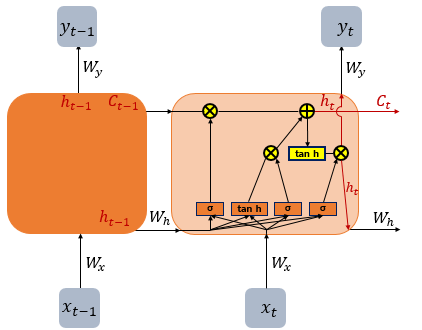

위의 그림은 LSTM의 전체적인 내부의 모습을 보여줍니다. 전통적인 RNN의 이러한 단점을 보완한 RNN의 일종을 장단기 메모리(Long Short-Term Memory)라고 하며, 줄여서 LSTM이라고 합니다. LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정합니다. 요약하면 LSTM은 은닉 상태(hidden state)를 계산하는 식이 전통적인 RNN보다 조금 더 복잡해졌으며 셀 상태(cell state)라는 값을 추가하였습니다. 위의 그림에서는 t시점의 셀 상태를 $C_t$로 표현하고 있습니다. LSTM은 RNN과 비교하여 긴 시퀀스의 입력을 처리하는데 탁월한 성능을 보입니다.

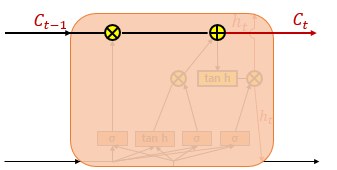

셀 상태는 위의 그림에서 왼쪽에서 오른쪽으로 가는 굵은 선입니다. 셀 상태 또한 이전에 배운 은닉 상태처럼 이전 시점의 셀 상태가 다음 시점의 셀 상태를 구하기 위한 입력으로서 사용됩니다.

은닉 상태값과 셀 상태값을 구하기 위해서 새로 추가 된 3개의 게이트를 사용합니다. 각 게이트는 삭제 게이트, 입력 게이트, 출력 게이트라고 부르며 이 3개의 게이트에는 공통적으로 시그모이드 함수가 존재합니다. 시그모이드 함수를 지나면 0과 1사이의 값이 나오게 되는데 이 값들을 가지고 게이트를 조절합니다. 아래의 내용을 먼저 이해하고 각 게이트에 대해서 알아보도록 하겠습니다.

+ 이하 식에서 σ는 시그모이드 함수를 의미합니다.

+ 이하 식에서 tanh는 하이퍼볼릭탄젠트 함수를 의미합니다.

+ $W_{xi}, W_{xg}, W_{xf}, W_{xo}$는 $x_t$와 함께 각 게이트에서 사용되는 4개의 가중치입니다.

+ $W_{hi}, W_{hg}, W_{hf}, W_{ho}$는 $h_{t-1}$와 함께 각 게이트에서 사용되는 4개의 가중치입니다.

+ $b_{i}, b_{g}, b_{f}, b_{o}$는 각 게이트에서 사용되는 4개의 편향입니다.

## (1) 입력 게이트

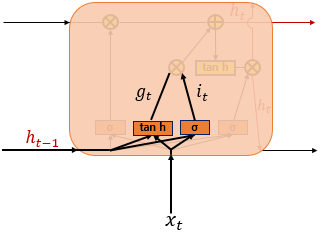

$i_{t}=σ(W_{xi}x_{t}+W_{hi}h_{t-1}+b_{i})$

$g_{t}=tanh(W_{xg}x_{t}+W_{hg}h_{t-1}+b_{g})$

입력 게이트는 현재 정보를 기억하기 위한 게이트입니다. 우선 현재 시점 t의 $x$값과 입력 게이트로 이어지는 가중치 $W_{xi}$를 곱한 값과 이전 시점 t-1의 은닉 상태가 입력 게이트로 이어지는 가중치 $W_{hi}$를 곱한 값을 더하여 시그모이드 함수를 지납니다. 이를 $i_t$라고 합니다.

그리고 현재 시점 t의 $x$값과 입력 게이트로 이어지는 가중치 $W_{xg}$를 곱한 값과 이전 시점 t-1의 은닉 상태가 입력 게이트로 이어지는 가중치 $W_{hg}$를 곱한 값을 더하여 하이퍼볼릭탄젠트 함수를 지납니다. 이를 $g_t$라고 합니다.

시그모이드 함수를 지나 0과 1 사이의 값과 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값 두 개가 나오게 됩니다. 이 두 개의 값을 가지고 이번에 선택된 기억할 정보의 양을 정하는데, 구체적으로 어떻게 결정하는지는 아래에서 배우게 될 셀 상태 수식을 보면 됩니다.

## (2) 삭제 게이트

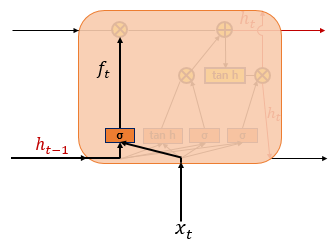

$f_{t}=σ(W_{xf}x_{t}+W_{hf}h_{t-1}+b_{f})$

삭제 게이트는 기억을 삭제하기 위한 게이트입니다. 현재 시점 t의 
값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지나게 됩니다. 시그모이드 함수를 지나면 0과 1 사이의 값이 나오게 되는데, 이 값이 곧 삭제 과정을 거친 정보의 양입니다. 0에 가까울수록 정보가 많이 삭제된 것이고 1에 가까울수록 정보를 온전히 기억한 것입니다. 이를 가지고 셀 상태를 구하게 되는데, 구체적으로는 아래의 셀 상태 수식을 보면 됩니다.

## (3) 셀 상태(장기 상태)

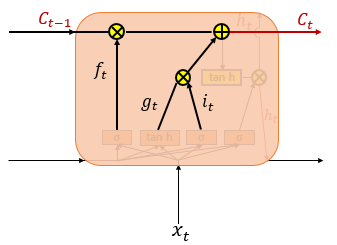

$C_{t}=f_{t}∘C_{t-1}+i_{t}∘g_{t}$

셀 상태 $C_t$를 LSTM에서는 장기 상태라고 부르기도 합니다. 그렇다면 셀 상태를 구하는 방법을 알아보겠습니다. 삭제 게이트에서 일부 기억을 잃은 상태입니다.

입력 게이트에서 구한 $i_t$, $g_t$ 이 두 개의 값에 대해서 원소별 곱(entrywise product)을 진행합니다. 다시 말해 같은 크기의 두 행렬이 있을 때 같은 위치의 성분끼리 곱하는 것을 말합니다. 여기서는 식으로 ∘ 로 표현합니다. 이것이 이번에 선택된 기억할 값입니다.

입력 게이트에서 선택된 기억을 이전 셀 상태$C_{t-1}$과 삭제 게이트의 결과값$f_t$를 곱해서 더합니다. 이 값을 현재 시점 t의 셀 상태라고 하며, 이 값은 다음 t+1 시점의 LSTM 셀로 넘겨집니다.

삭제 게이트와 입력 게이트의 영향력을 이해해봅시다. 만약 삭제 게이트의 출력값인 $f_t$가 0이 된다면, 이전 시점의 셀 상태값인 $C_{t-1}$은 현재 시점의 셀 상태값을 결정하기 위한 영향력이 0이 되면서, 오직 입력 게이트의 결과만이 현재 시점의 셀 상태값 $C_{t}$
을 결정할 수 있습니다. 이는 삭제 게이트가 완전히 닫히고 입력 게이트를 연 상태를 의미합니다. 반대로 입력 게이트의 $i_t$값을 0이라고 한다면, 현재 시점의 셀 상태값 $C_t$는 오직 이전 시점의 셀 상태값 $C_{t-1}$의 값에만 의존합니다. 이는 입력 게이트를 완전히 닫고 삭제 게이트만을 연 상태를 의미합니다. 결과적으로 **삭제 게이트는 이전 시점의 입력을 얼마나 반영할지를 의미하고, 입력 게이트는 현재 시점의 입력을 얼마나 반영할지를 결정합니다.**

## (4) 출력 게이트와 은닉 상태(단기 상태)

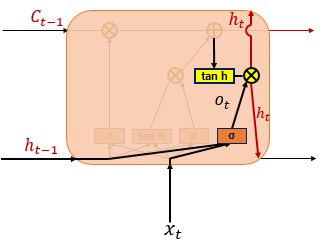

$o_{t}=σ(W_{xo}x_{t}+W_{ho}h_{t-1}+b_{o})$

$h_{t}=o_{t}∘tanh(c_{t})$

출력 게이트는 현재 시점 t의 $x$값과 이전 시점 t-1의 은닉 상태 $h_{t-1}$가 시그모이드 함수를 지난 값입니다. 해당 값은 현재 시점 t의 은닉 상태를 결정하는 일에 쓰이게 됩니다.

은닉 상태를 단기 상태라고 하기도 합니다. 은닉 상태는 장기 상태의 값이 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값입니다. 해당 값은 출력 게이트의 값과 연산되면서, 값이 걸러지는 효과가 발생합니다. 단기 상태의 값은 또한 출력층으로도 향합니다.

# 4. 파이토치의 nn.LSTM()

---

파이토치에서 LSTM 셀을 사용하는 방법은 매우 간단합니다. 기존에 RNN 셀을 사용하려고 했을 때는 다음과 같이 사용했었습니다.

In [1]:
# nn.RNN(input_dim, hidden_size, batch_fisrt=True)

LSTM 셀은 이와 유사하게 다음과 같이 사용합니다.

In [2]:
# nn.LSTM(input_dim, hidden_size, batch_fisrt=True)  